# Análisis Conjunto Barcelona. 
## Unión de los tres datasets trabajados, análisis estadístico y de correlaciones, selección de características para los datos de Barcelona ciudad 2018 y 2019

1. Carga de fuentes de datos
2. Comprensión de los datos mediante:
    1. Estadística descriptiva
    2. Visualización.
3. Preparación del modelo.
    1. Pre-procesar los datos para describir mejor la estructura del problema.
    2. Selección de características.

## 1. Carga de fuentes de datos

In [1]:
#Importamos las librerías que vamos a usar para los distintos pasos del problema

import numpy as np
import pandas as pd
from numpy import set_printoptions
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Carga del dataset trabajado de calidad del aire en Barcelona

In [2]:
#cogemos el dataset trabajado anteriormente con los datos de calidad del aire en Barcelona
url_fichero_cal = '../../Contaminacion/datosContaminacionBarcelona/JupiterNoteBook/contaminacionBarcelona2018_2019.csv'
dfContaminacionBarcelona = pd.read_csv(url_fichero_cal)
dfContaminacionBarcelona = dfContaminacionBarcelona.set_index('date')
print(dfContaminacionBarcelona)

                 pm10        no2  year  month  day   month-day  ndia
date                                                                
2018-01-01  10.000000  24.000000  2018      1    1  1900-01-01     1
2018-01-02  11.000000  10.000000  2018      1    2  1900-01-02     2
2018-01-03  10.000000   7.000000  2018      1    3  1900-01-03     3
2018-01-04  11.000000  14.000000  2018      1    4  1900-01-04     4
2018-01-05  10.000000  20.000000  2018      1    5  1900-01-05     5
...               ...        ...   ...    ...  ...         ...   ...
2019-12-27  16.000000  18.000000  2019     12   27  1900-12-27   726
2019-12-28  19.000000  16.000000  2019     12   28  1900-12-28   727
2019-12-29  23.000000  17.641379  2019     12   29  1900-12-29   728
2019-12-30  23.712692  17.641379  2019     12   30  1900-12-30   729
2019-12-31  23.712692  15.000000  2019     12   31  1900-12-31   730

[730 rows x 7 columns]


### Carga del dataset trabajado de meterología en Barcelona

In [3]:
#ahora cargamos el dataset con los datos trabajados de meteorología en Barcelona
url_fichero_met = '../../Meteorologia/df_sinhoras_estacion_datos_diarios_bcn.csv'
dfMeteoBarcelona = pd.read_csv(url_fichero_met)
dfMeteoBarcelona = dfMeteoBarcelona.set_index('fecha')
dfMeteoBarcelona.index.rename('date', inplace=True)
print(dfMeteoBarcelona)

           indicativo                nombre  provincia  altitud  tmed  prec  \
date                                                                          
2018-01-01       0076  BARCELONA AEROPUERTO  BARCELONA      4.0  13.2   0.0   
2018-01-02       0076  BARCELONA AEROPUERTO  BARCELONA      4.0  13.6   0.0   
2018-01-03       0076  BARCELONA AEROPUERTO  BARCELONA      4.0  16.8   0.0   
2018-01-04       0076  BARCELONA AEROPUERTO  BARCELONA      4.0  18.9   0.0   
2018-01-05       0076  BARCELONA AEROPUERTO  BARCELONA      4.0  15.0   0.0   
...               ...                   ...        ...      ...   ...   ...   
2019-12-27      0201D             BARCELONA  BARCELONA      6.0  12.0   0.0   
2019-12-28      0201D             BARCELONA  BARCELONA      6.0  11.0   0.0   
2019-12-29      0201D             BARCELONA  BARCELONA      6.0  12.3   0.0   
2019-12-30      0201D             BARCELONA  BARCELONA      6.0  11.6   0.0   
2019-12-31      0201D             BARCELONA  BARCELO

El dataset de Barcelona trae datos de 2 estaciones distintas. Vamos a quedarnos exclusivamente con los de la estación Barcelona, Barcelona por ser la más cercana a la estación de Calidad que hemos usado.

In [4]:
dfMeteoBarcelona = dfMeteoBarcelona.loc[dfMeteoBarcelona.indicativo =='0201D']
print(dfMeteoBarcelona)

           indicativo     nombre  provincia  altitud  tmed  prec  tmin  tmax  \
date                                                                           
2018-01-01      0201D  BARCELONA  BARCELONA      6.0  12.8   0.0  10.2  10.2   
2018-01-02      0201D  BARCELONA  BARCELONA      6.0  14.6   0.0  11.4  11.4   
2018-01-03      0201D  BARCELONA  BARCELONA      6.0  17.9   0.0  14.0  14.0   
2018-01-04      0201D  BARCELONA  BARCELONA      6.0  19.2   0.0  16.4  16.4   
2018-01-05      0201D  BARCELONA  BARCELONA      6.0  16.4   0.0  13.7  13.7   
...               ...        ...        ...      ...   ...   ...   ...   ...   
2019-12-27      0201D  BARCELONA  BARCELONA      6.0  12.0   0.0   8.5   8.5   
2019-12-28      0201D  BARCELONA  BARCELONA      6.0  11.0   0.0   6.6   6.6   
2019-12-29      0201D  BARCELONA  BARCELONA      6.0  12.3   0.0  10.2  10.2   
2019-12-30      0201D  BARCELONA  BARCELONA      6.0  11.6   0.0   8.8   8.8   
2019-12-31      0201D  BARCELONA  BARCEL

### Carga del dataset trabajado de tráfico en Barcelona

In [5]:
url_fichero_traf = '../../Tráfico/Barcelona/DatosEstadoTraficoBarcelona_SinMadrugadas.csv'
dfTraficoBarcelona = pd.read_csv(url_fichero_traf)
dfTraficoBarcelona = dfTraficoBarcelona.set_index('Fecha')
dfTraficoBarcelona.index.rename('date', inplace=True)
print(dfTraficoBarcelona)

            Estado_Actual  diadelasemana  findesemana
date                                                 
2018-01-01       1.501611              0            0
2018-01-02       1.855361              1            0
2018-01-03       1.914663              2            0
2018-01-04       1.917587              3            0
2018-01-05       1.933171              4            0
...                   ...            ...          ...
2019-12-27       1.879245              4            0
2019-12-28       1.677568              5            1
2019-12-29       1.567480              6            1
2019-12-30       1.895104              0            0
2019-12-31       1.804372              1            0

[730 rows x 3 columns]


### Unión de los tres datasets para tener datos de Calidad, Meteo y Tráfico en Barcelona conjuntamente

In [6]:
dfMergeado = pd.merge(dfContaminacionBarcelona, dfMeteoBarcelona, left_index=True, right_index=True)
dfMergeado = pd.merge(dfMergeado, dfTraficoBarcelona, left_index=True, right_index=True)
print(dfMergeado)

                 pm10        no2  year_x  month_x  day   month-day  ndia  \
date                                                                       
2018-01-01  10.000000  24.000000    2018        1    1  1900-01-01     1   
2018-01-02  11.000000  10.000000    2018        1    2  1900-01-02     2   
2018-01-03  10.000000   7.000000    2018        1    3  1900-01-03     3   
2018-01-04  11.000000  14.000000    2018        1    4  1900-01-04     4   
2018-01-05  10.000000  20.000000    2018        1    5  1900-01-05     5   
...               ...        ...     ...      ...  ...         ...   ...   
2019-12-27  16.000000  18.000000    2019       12   27  1900-12-27   726   
2019-12-28  19.000000  16.000000    2019       12   28  1900-12-28   727   
2019-12-29  23.000000  17.641379    2019       12   29  1900-12-29   728   
2019-12-30  23.712692  17.641379    2019       12   30  1900-12-30   729   
2019-12-31  23.712692  15.000000    2019       12   31  1900-12-31   730   

           

## 2. Comprensión de los datos mediante:
1. Estadística descriptiva
2. Visualización.

Eliminamos columnas innecesarias o duplicadas

In [7]:
dfMergeado = dfMergeado.drop(columns=['month-day','ndia','indicativo','nombre','provincia','altitud','year_y','month_y'])
dfMergeado.rename(columns = {'year_x': 'year', 'month_x': 'month', 'Estado_Actual': 'estado_trafico'}, inplace = True)
print(dfMergeado)

                 pm10        no2  year  month  day  tmed  prec  tmin  tmax  \
date                                                                         
2018-01-01  10.000000  24.000000  2018      1    1  12.8   0.0  10.2  10.2   
2018-01-02  11.000000  10.000000  2018      1    2  14.6   0.0  11.4  11.4   
2018-01-03  10.000000   7.000000  2018      1    3  17.9   0.0  14.0  14.0   
2018-01-04  11.000000  14.000000  2018      1    4  19.2   0.0  16.4  16.4   
2018-01-05  10.000000  20.000000  2018      1    5  16.4   0.0  13.7  13.7   
...               ...        ...   ...    ...  ...   ...   ...   ...   ...   
2019-12-27  16.000000  18.000000  2019     12   27  12.0   0.0   8.5   8.5   
2019-12-28  19.000000  16.000000  2019     12   28  11.0   0.0   6.6   6.6   
2019-12-29  23.000000  17.641379  2019     12   29  12.3   0.0  10.2  10.2   
2019-12-30  23.712692  17.641379  2019     12   30  11.6   0.0   8.8   8.8   
2019-12-31  23.712692  15.000000  2019     12   31  10.8   0.0  

In [8]:
dfMergeado.columns

Index(['pm10', 'no2', 'year', 'month', 'day', 'tmed', 'prec', 'tmin', 'tmax',
       'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin', 'week',
       'season', 'season_name', 'estado_trafico', 'diadelasemana',
       'findesemana'],
      dtype='object')

In [9]:
dfMergeado.dtypes

pm10              float64
no2               float64
year                int64
month               int64
day                 int64
tmed              float64
prec              float64
tmin              float64
tmax              float64
dir               float64
velmedia          float64
racha             float64
sol               float64
presmax           float64
presmin           float64
week                int64
season              int64
season_name        object
estado_trafico    float64
diadelasemana       int64
findesemana         int64
dtype: object

In [10]:
dfMergeado.describe()

,pm10,no2,year,month,day,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presmax,presmin,week,season,estado_trafico,diadelasemana,findesemana
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,23.712692,17.641379,2018.500000,6.526027,15.720548,17.377671,1.894795,14.220411,14.220411,24.273973,3.478904,9.686712,6.872055,1017.831644,1013.038904,26.430137,2.504110,1.939048,2.993151,0.284932
std,9.818295,6.116245,0.500343,3.450215,8.802278,5.720078,7.441101,6.014140,6.014140,19.131528,1.439591,3.484361,3.838669,6.537202,7.507896,15.057227,1.115109,0.197816,2.003072,0.451691
min,2.000000,4.000000,2018.000000,1.000000,1.000000,2.700000,0.000000,0.100000,0.100000,1.000000,0.000000,3.900000,0.000000,994.500000,987.400000,1.000000,1.000000,1.446474,0.000000,0.000000
25%,17.000000,13.000000,2018.000000,4.000000,8.000000,12.500000,0.000000,9.100000,9.100000,12.000000,2.500000,7.200000,4.200000,1014.600000,1009.300000,13.000000,2.000000,1.765103,1.000000,0.000000
50%,23.000000,17.000000,2018.500000,7.000000,16.000000,16.600000,0.000000,13.600000,13.600000,21.000000,3.300000,8.900000,7.000000,1017.700000,1013.600000,26.000000,3.000000,2.016668,3.000000,0.000000
75%,29.000000,22.000000,2019.000000,10.000000,23.000000,22.500000,0.000000,19.600000,19.600000,29.000000,4.200000,11.400000,10.300000,1021.300000,1017.200000,39.000000,3.000000,2.097403,5.000000,1.000000
max,85.000000,47.000000,2019.000000,12.000000,31.000000,30.000000,83.900000,27.100000,27.100000,99.000000,12.800000,26.100000,13.200000,1037.000000,1032.000000,52.000000,4.000000,2.333111,6.000000,1.000000


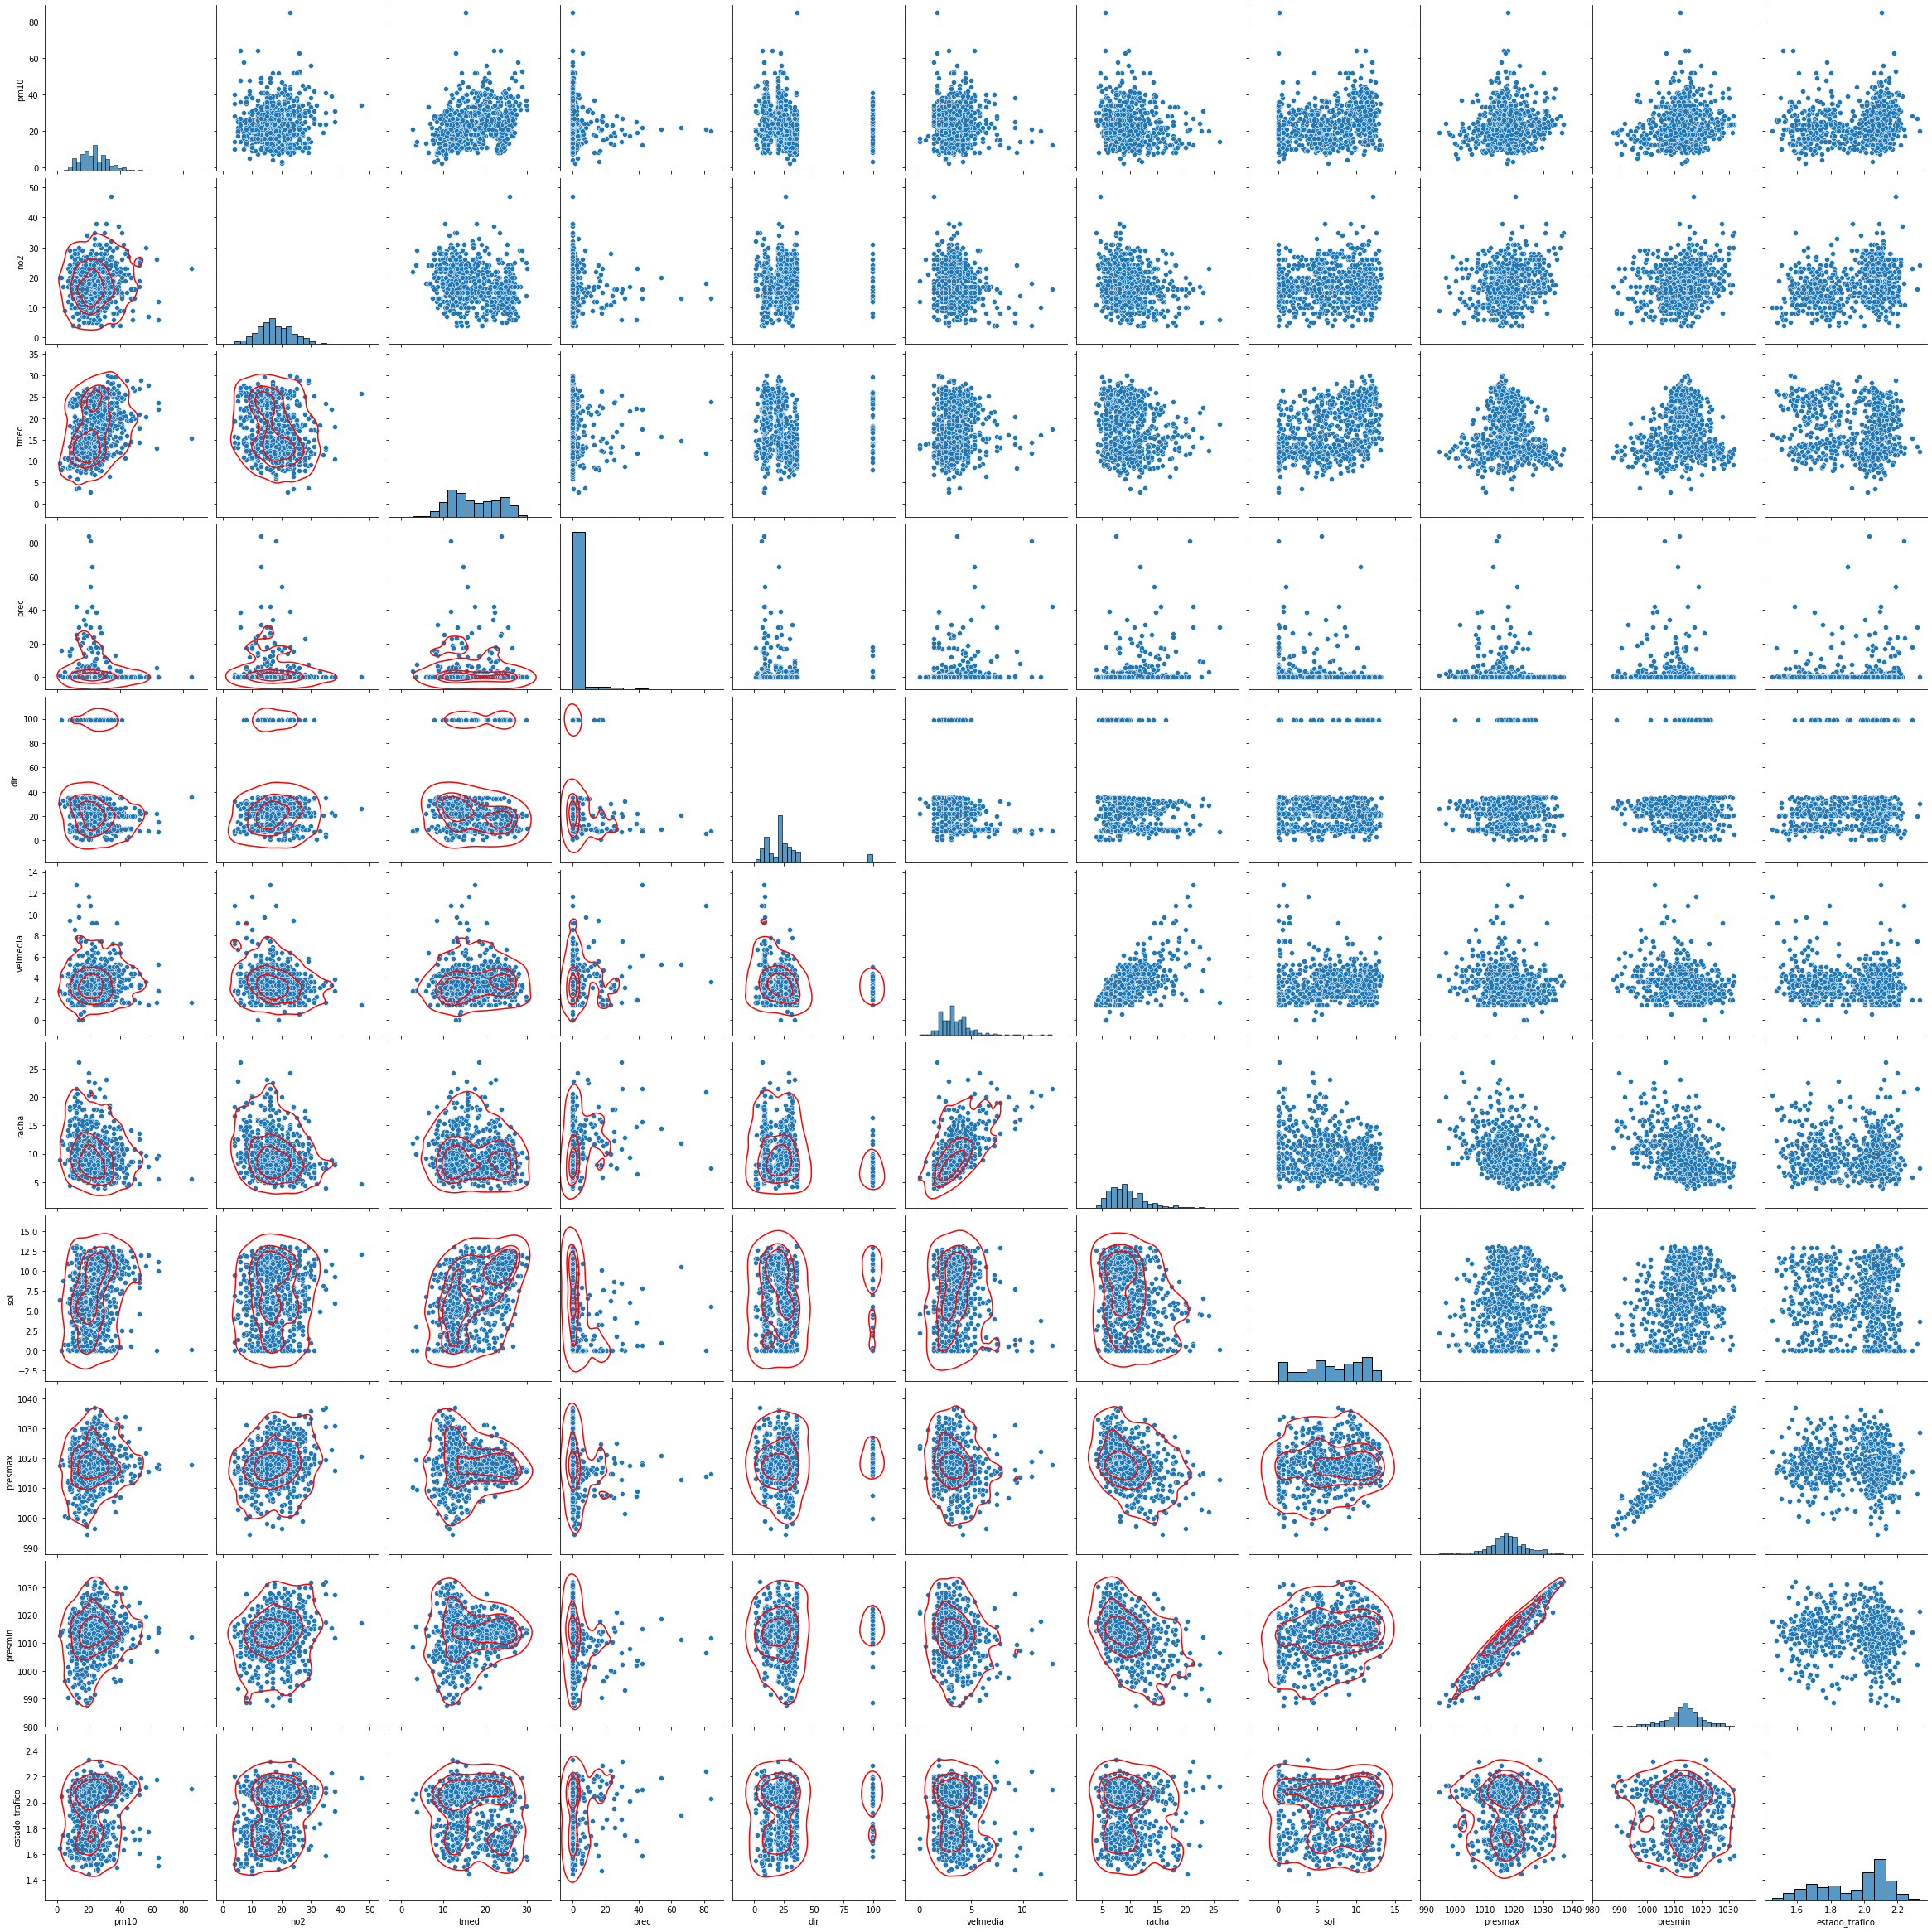

In [11]:
g = sns.pairplot(dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin','estado_trafico']], diag_kind="hist",height=3,palette='Set1')
g.map_lower(sns.kdeplot, levels=4, color="red")

Nos interesa saber si hay algún tipo de relación entre los datos de calidad del aire (2 primeros campos), los de tráfico (el último campo) y los de meteorología (el resto de campos).

Lo que en este gráfico podemos ver es:

1) hay una cierta relación positiva entre PM10 y la TemperaturaMedia. En el caso de NO2, parece haber una pequeña relación negativa. Por tanto, a mayor temperatura hay una tendencia a tener más partículas PM10 y menos NO2.

2) comparando PM10 con Precipitaciones, vemos que con precipitaciones elevadas se dan pocas partículas pm10. Sólo obtenemos valores elevados de pm10 cuando hay poca precipitación. Lo cual era de esperar. 

3) igualmente pasa con NO2 y las precipitaciones, si bien algo menos acusado. 

4) PM10 - presionMx y presionMin : para valores de presión alejadas de la media (tanto por arriba como por abajo), las partículas PM10 se mantienen en nivel bajo. No ocurre así con el NO2

Hacemos ahora una matriz de correlación y un mapa de correlaciones

In [12]:
dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin','estado_trafico']].corr()

,pm10,no2,tmed,prec,dir,velmedia,racha,sol,presmax,presmin,estado_trafico
pm10,1.000000,0.074557,0.311544,-0.087114,-0.065160,-0.019697,-0.191508,0.254505,0.105456,0.168167,0.151629
no2,0.074557,1.000000,-0.229145,-0.084985,0.071549,-0.242991,-0.225732,0.068971,0.237526,0.209570,0.267998
tmed,0.311544,-0.229145,1.000000,-0.035765,-0.092527,0.095986,-0.104370,0.463579,-0.071612,0.072212,-0.119991
prec,-0.087114,-0.084985,-0.035765,1.000000,-0.084025,0.184313,0.258647,-0.235008,-0.132331,-0.155132,0.069633
dir,-0.065160,0.071549,-0.092527,-0.084025,1.000000,-0.169166,-0.108545,-0.004862,0.040693,0.029459,0.072417
velmedia,-0.019697,-0.242991,0.095986,0.184313,-0.169166,1.000000,0.599295,0.034186,-0.187566,-0.212256,-0.058458
racha,-0.191508,-0.225732,-0.104370,0.258647,-0.108545,0.599295,1.000000,-0.217229,-0.352043,-0.457602,-0.034544
sol,0.254505,0.068971,0.463579,-0.235008,-0.004862,0.034186,-0.217229,1.000000,0.111352,0.219309,0.011711
presmax,0.105456,0.237526,-0.071612,-0.132331,0.040693,-0.187566,-0.352043,0.111352,1.000000,0.931002,-0.054390
presmin,0.168167,0.209570,0.072212,-0.155132,0.029459,-0.212256,-0.457602,0.219309,0.931002,1.000000,-0.068963


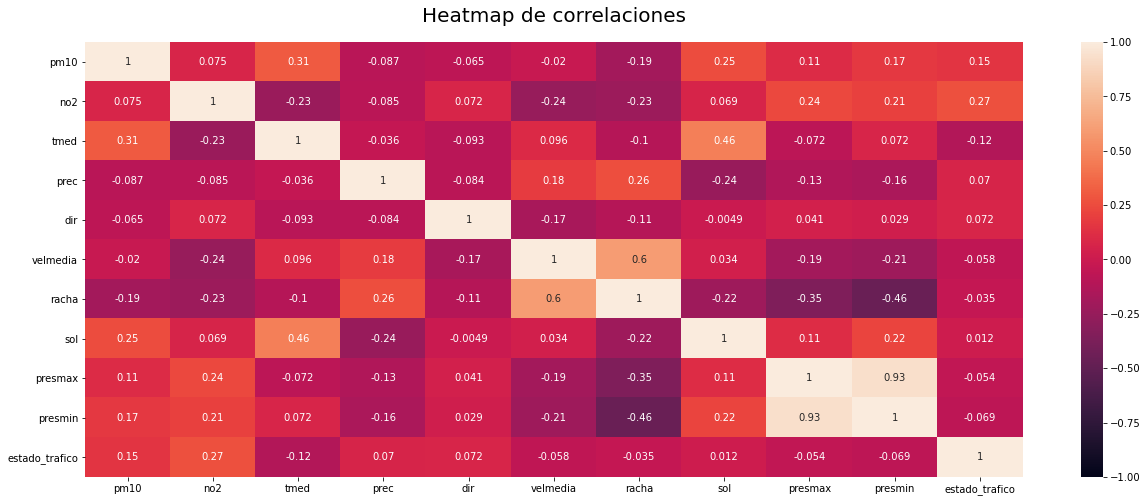

In [13]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin','estado_trafico']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones', fontdict={'fontsize':20}, pad=20);

De esta tabla podemos ver lo siguiente:

1) Como vimos antes, hay una pequeña correlación positiva entre PM10 y TMed, y negativa entre NO2 y Tmed. Aunque son correlaciones pequeñas son de las mayores que se dan entre variables de calidad y meteorología.

2) Se ven ahora también unas ciertas correlaciones entre:
- PM10 y Sol (positiva)
- NO2 y VelMedia y racha del viento (negativa)
- NO2 y PresMax (positiva)
- NO2 y Estado del tráfico (positiva)

3) Según esto, por tanto, parece que el tráfico influye sólo en cierta medida en la concentración de NO2, y prácticamente nada en la de PM10

Analizamos cada variable y sus sesgos

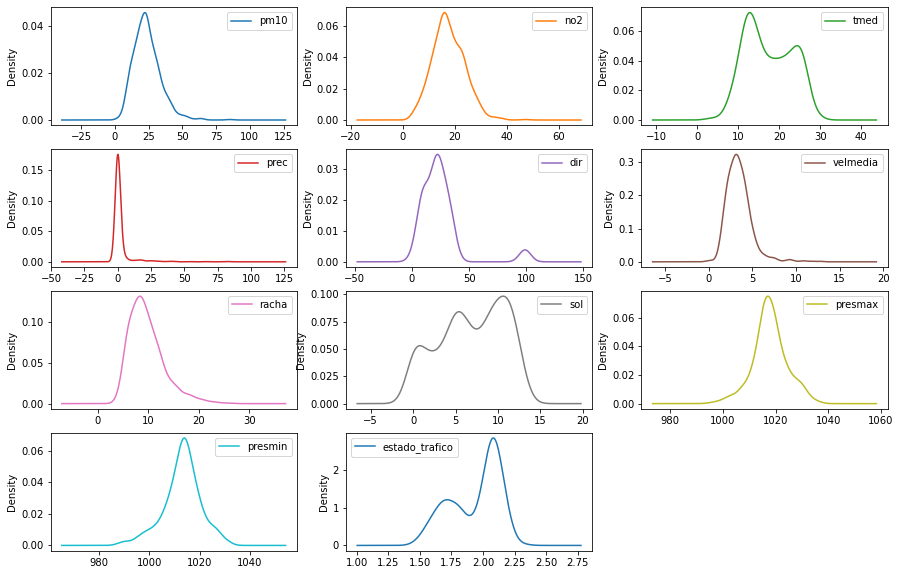

In [14]:
dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin','estado_trafico']].plot(
    kind='density', subplots=True, layout=(4,3), figsize=(15,10), sharex=False);


In [15]:
print(dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax',
                  'presmin','estado_trafico']].skew())

pm10              1.065471
no2               0.419262
tmed              0.151299
prec              6.500446
dir               2.807892
velmedia          1.780141
racha             1.219726
sol              -0.275850
presmax          -0.087848
presmin          -0.476289
estado_trafico   -0.551678
dtype: float64


Es probable que convenga normalizar las variables. Lo probaremos después en iteraciones de prueba de algoritmos.

Exportamos a un CSV el dataset mergeado sin ninguna transformación, antes de comenzar con la selección de características

In [16]:
dfMergeado.to_csv('DatosMergeadosBarcelona.csv')

## Selección de características

Vamos a analizar una posible selección de características de Meteorología y Tráfico con cuatro sistemas distintos, y después escogeremos con cuál quedarnos.

Lo haremos para PM10 y para NO2, comparando los resultados para ambos.

In [17]:
nombres = ['tmed','prec','dir','velmedia','racha','sol','presmax','presmin','estado_trafico']
dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin','estado_trafico']].head()

,pm10,no2,tmed,prec,dir,velmedia,racha,sol,presmax,presmin,estado_trafico
date,,,,,,,,,,,
2018-01-01,10.0,24.0,12.8,0.0,31.0,4.2,18.1,5.1,1027.2,1017.9,1.501611
2018-01-02,11.0,10.0,14.6,0.0,30.0,3.3,10.3,3.1,1025.4,1022.2,1.855361
2018-01-03,10.0,7.0,17.9,0.0,31.0,3.9,18.3,1.9,1023.0,1018.7,1.914663
2018-01-04,11.0,14.0,19.2,0.0,31.0,5.0,20.0,5.9,1019.0,1015.1,1.917587
2018-01-05,10.0,20.0,16.4,0.0,30.0,3.3,13.3,6.4,1015.2,1004.6,1.933171


In [18]:
## Para Selección univariante
from sklearn.feature_selection import SelectKBest, f_regression

## Para PCA (Análisis de Componentes Principales)
from sklearn.decomposition import PCA

## Para RFE (Eliminación de Características Recursiva)
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Para importancia de la característica
from sklearn.ensemble import ExtraTreesRegressor


array = dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol',
                    'presmax','presmin','estado_trafico']].values
X = array[:,2:]
Ypm10 = array[:,0]
Yno2 = array[:,1]

### 1.1 Selección univariante - para PM10

In [19]:
# 1.Extracción de 5 características con pruebas estadísticas univariadas 

Y = Ypm10

##  (f_regression para regresión)
test = SelectKBest(score_func=f_regression, k=5)
fit = test.fit(X, Y)

# resumir puntuaciones
set_printoptions(precision=3)
print('Puntuaciones de las características')
print(nombres)
print(fit.scores_)
features = fit.transform(X)

# resumen de las características seleccionadas
print('\nResumen de valores de las 5 características elegidas')
print(features[0:5,:])

Puntuaciones de las características
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin', 'estado_trafico']
[78.255  5.567  3.104  0.283 27.716 50.42   8.187 21.187 17.131]

Resumen de valores de las 5 características elegidas
[[  12.8     18.1      5.1   1017.9      1.502]
 [  14.6     10.3      3.1   1022.2      1.855]
 [  17.9     18.3      1.9   1018.7      1.915]
 [  19.2     20.       5.9   1015.1      1.918]
 [  16.4     13.3      6.4   1004.6      1.933]]


            campo      punts
0            tmed  78.254652
5             sol  50.420360
4           racha  27.716266
7         presmin  21.187055
8  estado_trafico  17.131481
6         presmax   8.187078
1            prec   5.566937
2             dir   3.104118
3        velmedia   0.282542


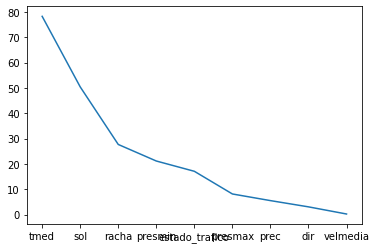

In [20]:
puntuaciones = {'campo':nombres, 'punts':fit.scores_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Las características elegidas son: [ 'tmed' , 'sol' , 'racha' , 'presmin' , 'estado_trafico']

### 1.2 Selección univariante - para NO2

In [21]:
# 1.Extracción de 5 características con pruebas estadísticas univariadas 

Y = Yno2

##  (f_regression para regresión)
test = SelectKBest(score_func=f_regression, k=5)
fit = test.fit(X, Y)

# resumir puntuaciones
set_printoptions(precision=3)
print('Puntuaciones de las características')
print(nombres)
print(fit.scores_)
features = fit.transform(X)

# resumen de las características seleccionadas
print('\nResumen de valores de las 5 características elegidas')
print(features[0:5,:])

Puntuaciones de las características
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin', 'estado_trafico']
[40.344  5.296  3.746 45.682 39.087  3.48  43.529 33.442 56.333]

Resumen de valores de las 5 características elegidas
[[  12.8      4.2     18.1   1027.2      1.502]
 [  14.6      3.3     10.3   1025.4      1.855]
 [  17.9      3.9     18.3   1023.       1.915]
 [  19.2      5.      20.    1019.       1.918]
 [  16.4      3.3     13.3   1015.2      1.933]]


            campo      punts
8  estado_trafico  56.333103
3        velmedia  45.681592
6         presmax  43.528743
0            tmed  40.343713
4           racha  39.086809
7         presmin  33.442243
1            prec   5.296224
2             dir   3.745969
5             sol   3.479621


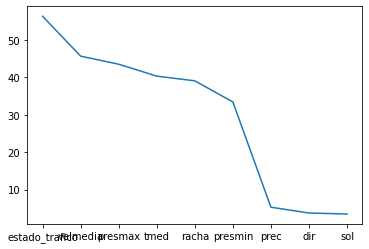

In [22]:
puntuaciones = {'campo':nombres, 'punts':fit.scores_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Las características elegidas son: ['estado_trafico' , 'velmedia' , 'presmax' , 'tmed' , 'racha']

### 2.1 RFE (Recursive Feature Elimination - Eliminación Recursiva de Características) - PM10

Usaremos RFE con el algoritmo de regresión lineal para seleccionar las 5 características principales. 

In [23]:
# 2.Extracción de características con RFE
## modelo = SVR

Y=Ypm10

modelo = SVR(kernel="linear")
rfe = RFE(modelo, n_features_to_select=5)

fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print(nombres)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin', 'estado_trafico']
Selected Features: [ True False False  True  True  True False False  True]
Feature Ranking: [1 5 4 1 1 1 3 2 1]


            campo  punts
0            tmed      1
3        velmedia      1
4           racha      1
5             sol      1
8  estado_trafico      1
7         presmin      2
6         presmax      3
2             dir      4
1            prec      5


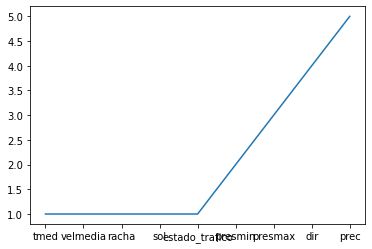

In [24]:
puntuaciones = {'campo':nombres, 'punts':fit.ranking_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=True)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Las características elegidas son: [ 'tmed' , 'velmedia' , 'racha' , 'sol' , 'estado_trafico']

### 2.2 RFE (Recursive Feature Elimination - Eliminación Recursiva de Características) - NO2

In [25]:
# 2.Extracción de características con RFE
## modelo = SVR

Y=Yno2

modelo = SVR(kernel="linear")
rfe = RFE(modelo, n_features_to_select=5)

fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print(nombres)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin', 'estado_trafico']
Selected Features: [ True False False  True False  True  True False  True]
Feature Ranking: [1 4 5 1 3 1 1 2 1]


            campo  punts
0            tmed      1
3        velmedia      1
5             sol      1
6         presmax      1
8  estado_trafico      1
7         presmin      2
4           racha      3
1            prec      4
2             dir      5


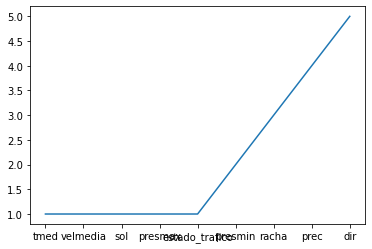

In [26]:
puntuaciones = {'campo':nombres, 'punts':fit.ranking_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=True)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Las características elegidas son: [ 'tmed' , 'velmedia' , 'sol' , 'presmax' , 'estado_trafico']

### 3 PCA (*Principal Component Analysis* – Análisis de Componente Principal)

El PCA no usa un modelo de algoritmo, es independiente del segmento Y, por lo que su implementación es ya válida tanto para el PM10 como para el NO2

El PCA no selecciona características sino que comprime todas las caractarísticas del segmento X en el número que le digamos (en este caso 5) de nuevas características calculadas.

In [27]:
# 3.Extracción de características con PCA
pca = PCA(n_components=5)
Xtransformed = pca.fit_transform(X)

# Vista resumen de los nuevos componentes
print(Xtransformed)

[[  7.005  -7.605   2.984  -6.094   9.566]
 [  6.181 -10.889   2.874  -4.334   2.991]
 [  6.785  -5.473   1.931  -2.179  10.56 ]
 ...
 [ 12.694 -21.9     6.649  -7.248  -0.492]
 [ 11.707 -22.782   7.117  -7.836   1.038]
 [  2.718 -22.734   6.791  -8.519   1.077]]


In [28]:
dfsinMeteo = dfMergeado[['pm10', 'no2', 'year', 'month', 'day', 'week','season', 'season_name', 
                         'diadelasemana','findesemana']]
dfPCA = pd.DataFrame(Xtransformed, columns=['PCA1','PCA2','PCA3','PCA4', 'PCA5'], index=dfMergeado.index)
dfMergeadoPCA = pd.merge(dfsinMeteo,dfPCA, left_index=True, right_index=True)
print(dfMergeadoPCA)

                 pm10        no2  year  month  day  week  season season_name  \
date                                                                           
2018-01-01  10.000000  24.000000  2018      1    1     1       1      Winter   
2018-01-02  11.000000  10.000000  2018      1    2     1       1      Winter   
2018-01-03  10.000000   7.000000  2018      1    3     1       1      Winter   
2018-01-04  11.000000  14.000000  2018      1    4     1       1      Winter   
2018-01-05  10.000000  20.000000  2018      1    5     1       1      Winter   
...               ...        ...   ...    ...  ...   ...     ...         ...   
2019-12-27  16.000000  18.000000  2019     12   27    52       1      Winter   
2019-12-28  19.000000  16.000000  2019     12   28    52       1      Winter   
2019-12-29  23.000000  17.641379  2019     12   29    52       1      Winter   
2019-12-30  23.712692  17.641379  2019     12   30     1       1      Winter   
2019-12-31  23.712692  15.000000  2019  

### 4.1 Importancia de Características - PM10

Usamos el modelo de ExtraTreesRegressor para identificar la importancia de las diferentes características

In [29]:
# 4.Extracción de importancia de las características

Y = Ypm10

model = ExtraTreesRegressor()
model.fit(X, Y)
print(nombres)
print(model.feature_importances_)

['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin', 'estado_trafico']
[0.191 0.045 0.098 0.093 0.098 0.159 0.093 0.103 0.12 ]


            campo     punts
0            tmed  0.190774
5             sol  0.158650
8  estado_trafico  0.120209
7         presmin  0.103482
4           racha  0.098084
2             dir  0.097861
3        velmedia  0.093106
6         presmax  0.093079
1            prec  0.044756


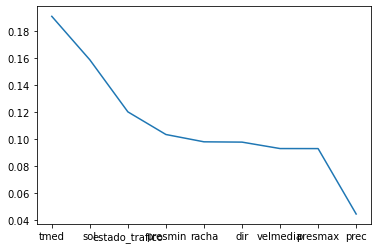

In [30]:
puntuaciones = {'campo':nombres, 'punts':model.feature_importances_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Seleccionando las 5 características con mayor puntuación, las características elegidas son: [ 'tmed' , 'sol' , 'estado_trafico' , 'racha' ,  'presmin' ] 

Identico a lo seleccionado por el sistema de Selección Univariante

### 4.2 Importancia de Características - NO2

In [31]:
# 4.Extracción de importancia de las características

Y = Yno2

model = ExtraTreesRegressor()
model.fit(X, Y)
print(nombres)
print(model.feature_importances_)

['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin', 'estado_trafico']
[0.133 0.047 0.08  0.116 0.116 0.101 0.117 0.107 0.182]


            campo     punts
8  estado_trafico  0.181773
0            tmed  0.133298
6         presmax  0.117063
3        velmedia  0.116484
4           racha  0.116355
7         presmin  0.107020
5             sol  0.100995
2             dir  0.080319
1            prec  0.046692


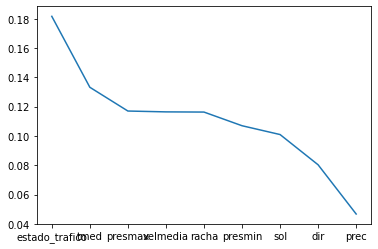

In [32]:
puntuaciones = {'campo':nombres, 'punts':model.feature_importances_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Seleccionando las 5 características con mayor puntuación, las características elegidas son: ['estado_trafico' , 'tmed' , 'presmax' , 'velmedia' , 'racha' ] 

Resumiendo:

- 1.1 Selección univariante PM10 - [ 'tmed' , 'sol' , 'racha' , 'presmin' , 'estado_trafico']
- 1.2 Selección univariante NO2 - ['estado_trafico' , 'velmedia' , 'presmax' , 'tmed' , 'racha']
- 2.1 RFE PM10 - [ 'tmed' , 'velmedia' , 'racha' , 'sol' , 'estado_trafico']
- 2.2 RFE NO2 - [ 'tmed' , 'velmedia' , 'sol' , 'presmax' , 'estado_trafico']
- 4.1 Importancia de Características PM10 - [ 'tmed' , 'sol' , 'estado_trafico' , 'racha' ,  'presmin' ] 
- 4.2 Importancia de Características NO2 - ['estado_trafico' , 'tmed' , 'presmax' , 'velmedia' , 'racha' ] 
 

CONCLUSIÓN: 

- Para la predicción de **PM10** escogeríamos **[ 'tmed' , 'racha' , 'estado_trafico' , 'sol' , 'presmin' ]** por ser la combinación más puntuada
- Para la predicción de **NO2** escogeríamos **[ 'estado_trafico' , 'tmed' , 'velmedia' , 'presmax' , 'racha' ]** por la misma razón

En caso de usar el sistema PCA, las 5 características serían las calculadas bajo el nombre de Xtransformed.

Vamos a exportar a CSV los dataset mergeados con las reducciones de características escogidas para MP10, NO2 y con PCA:

In [33]:
dfMergeadoSelCaracPM10 = dfMergeado[['pm10', 'year', 'month', 'day', 'tmed', 'racha', 'sol', 'presmin', 'week',
       'season', 'season_name', 'estado_trafico', 'diadelasemana',
       'findesemana']]
dfMergeadoSelCaracNO2 = dfMergeado[['no2', 'year', 'month', 'day', 'tmed', 'velmedia', 'racha', 'presmax', 'week',
       'season', 'season_name', 'estado_trafico', 'diadelasemana',
       'findesemana']]

dfMergeadoSelCaracPM10.to_csv('DatosMergeadosBarcelona_ConSeleccionCaract_ParaPM10.csv')
dfMergeadoSelCaracNO2.to_csv('DatosMergeadosBarcelona_ConSeleccionCaract_ParaNO2.csv')
dfMergeadoPCA.to_csv('DatosMergeadosBarcelona_ConSeleccionCaract_PCA.csv')